# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
plant = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
plant

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [9]:
plant.shape

(908, 25)

In [10]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [12]:
plant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Dataset has null values in many columns. Column other_fuel1, other_fuel2, other_fuel3, owner, wepp_id and estimated_generation_gwh have more than 50% null values, hence dropping this column.

<AxesSubplot:>

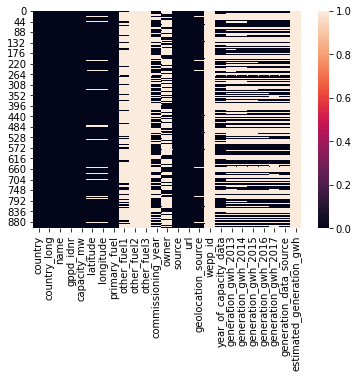

In [13]:
sns.heatmap(plant.isnull())

# Data Cleaning

In [14]:
# Drop Column

plant.drop(['other_fuel1'], axis =1, inplace = True)
plant.drop(['other_fuel2'], axis =1, inplace = True)
plant.drop(['other_fuel3'], axis =1, inplace =True)
plant.drop(['owner'], axis =1, inplace =True)
plant.drop(['wepp_id'], axis =1, inplace = True)
plant.drop(['generation_gwh_2013'], axis =1, inplace =True)
plant.drop(['generation_gwh_2014'], axis =1, inplace =True)
plant.drop(['estimated_generation_gwh'], axis =1, inplace =True)


In [15]:
plant.shape

(908, 17)

In [16]:
plant.drop(['country'], axis =1, inplace =True)
plant.drop(['country_long'], axis =1, inplace =True)
plant.drop(['name'], axis =1, inplace =True)
plant.drop(['gppd_idnr'], axis =1, inplace =True)

In [68]:
plant.drop(['year_of_capacity_data'], axis =1, inplace =True)

In [69]:
plant

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,12,1,NaN,NaN,NaN,1
1,98.0,24.7663,74.6090,1,2013.0,84,2,NaN,NaN,NaN,1
2,39.2,21.9038,69.3732,7,2013.0,105,2,NaN,NaN,NaN,1
3,135.0,23.8712,91.3602,2,2004.0,106,2,843.747000,886.004428,663.774500,0
4,1800.0,21.9603,82.4091,1,2015.0,106,2,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,106,2,0.994875,233.596650,865.400000,0
904,3.0,12.8932,78.1654,6,2013.0,166,0,NaN,NaN,NaN,1
905,25.5,15.2758,75.5811,7,2013.0,105,2,NaN,NaN,NaN,1
906,80.0,24.3500,73.7477,1,2013.0,146,2,NaN,NaN,NaN,1


In [18]:
plant.drop(['url'], axis =1, inplace =True)

In [87]:
plant.drop(['generation_gwh_2017'],axis=1, inplace =True)

In [88]:
plant.shape

(908, 8)

In [89]:
plant.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,24,1,1
1,98.0,24.7663,74.6090,1,2013.0,174,2,1
2,39.2,21.9038,69.3732,7,2013.0,8,2,1
3,135.0,23.8712,91.3602,2,2004.0,9,2,0
4,1800.0,21.9603,82.4091,1,2015.0,9,2,0


In [90]:
plant.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
generation_data_source    0
dtype: int64

In [91]:
# use simple imputer for null values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'most_frequent')


plant['latitude'] = imp.fit_transform(plant['latitude'].values.reshape(-1,1))
plant['longitude'] = imp.fit_transform(plant['longitude'].values.reshape(-1,1))
plant['commissioning_year'] = imp.fit_transform(plant['commissioning_year'].values.reshape(-1,1))

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list1 =['primary_fuel', 'source', 'geolocation_source', 'generation_data_source']
for val in list1:
    plant[val]= le.fit_transform(plant[val].astype(str))

In [93]:
plant

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,108,1,1
1,98.0,24.7663,74.6090,1,2013.0,84,2,1
2,39.2,21.9038,69.3732,7,2013.0,169,2,1
3,135.0,23.8712,91.3602,2,2004.0,180,2,0
4,1800.0,21.9603,82.4091,1,2015.0,180,2,0
...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,180,2,0
904,3.0,12.8932,78.1654,6,2013.0,164,0,1
905,25.5,15.2758,75.5811,7,2013.0,169,2,1
906,80.0,24.3500,73.7477,1,2013.0,140,2,1


Summary Statistics

In [94]:
plant.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_data_source
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.084948,77.156237,3.205947,2003.624449,153.944934,1.754405,0.504405
std,580.221767,6.107146,4.945215,2.281339,15.238021,48.131037,0.699844,0.500256
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,73.812975,1.000000,1997.000000,164.750000,2.000000,0.000000
50%,60.000000,21.278850,76.492900,3.000000,2013.000000,180.000000,2.000000,1.000000
75%,388.125000,25.183775,79.211600,6.000000,2013.000000,180.000000,2.000000,1.000000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,3.000000,1.000000


In [95]:
plant.skew()

capacity_mw               3.193257
latitude                 -0.093609
longitude                 1.118449
primary_fuel              0.471141
commissioning_year       -1.779021
source                   -1.857601
geolocation_source       -1.922080
generation_data_source   -0.017651
dtype: float64

# EDA

<AxesSubplot:>

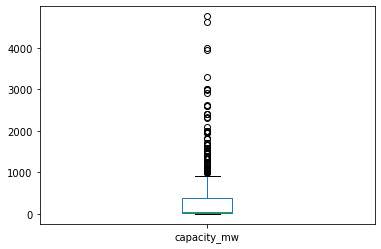

In [96]:
plant['capacity_mw'].plot.box()

<AxesSubplot:>

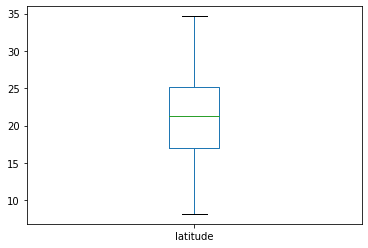

In [98]:
plant['latitude'].plot.box()

<AxesSubplot:>

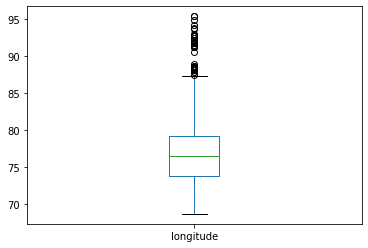

In [99]:
plant['longitude'].plot.box()

<AxesSubplot:>

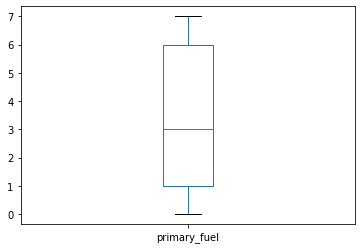

In [100]:
plant['primary_fuel'].plot.box()

<AxesSubplot:>

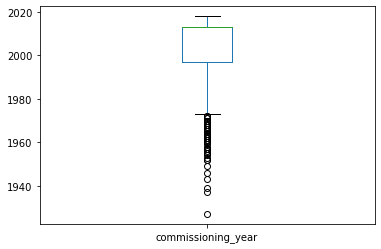

In [101]:
plant['commissioning_year'].plot.box()

<AxesSubplot:>

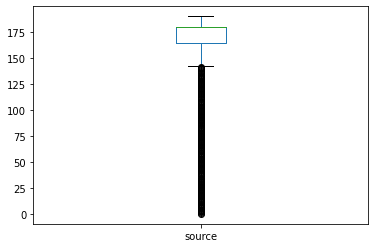

In [102]:
plant['source'].plot .box()

<AxesSubplot:>

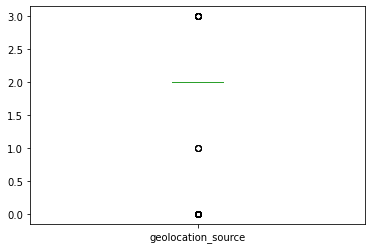

In [103]:
plant['geolocation_source'] .plot.box()

<AxesSubplot:>

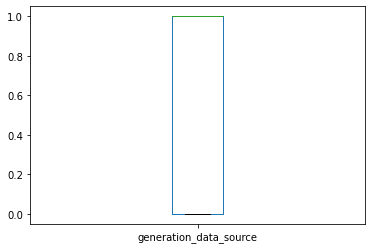

In [104]:
plant['generation_data_source'] .plot.box()

# Correlation

In [105]:
plant.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_data_source
capacity_mw,1.000000,0.057801,0.217022,-0.377783,0.012518,0.265421,0.183286,-0.494694
latitude,0.057801,1.000000,0.050511,-0.023407,0.035378,-0.048490,-0.194556,-0.094706
longitude,0.217022,0.050511,1.000000,-0.369505,-0.138390,0.244111,0.180463,-0.422820
primary_fuel,-0.377783,-0.023407,-0.369505,1.000000,0.145487,-0.105880,-0.419911,0.481758
commissioning_year,0.012518,0.035378,-0.138390,0.145487,1.000000,-0.333762,-0.215638,0.356669
source,0.265421,-0.048490,0.244111,-0.105880,-0.333762,1.000000,0.497150,-0.536883
geolocation_source,0.183286,-0.194556,0.180463,-0.419911,-0.215638,0.497150,1.000000,-0.348041
generation_data_source,-0.494694,-0.094706,-0.422820,0.481758,0.356669,-0.536883,-0.348041,1.000000


<AxesSubplot:>

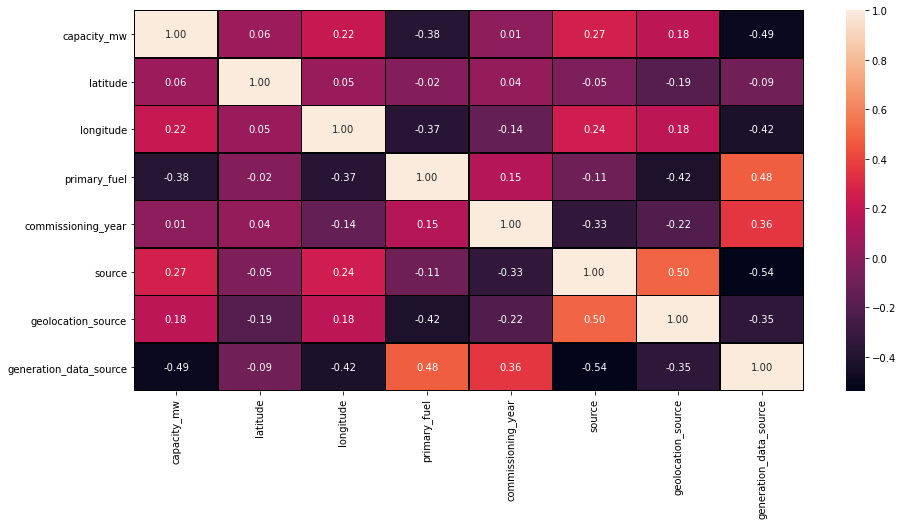

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(plant.corr(), annot = True, linewidth = 0.5, linecolor= 'black', fmt= '.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

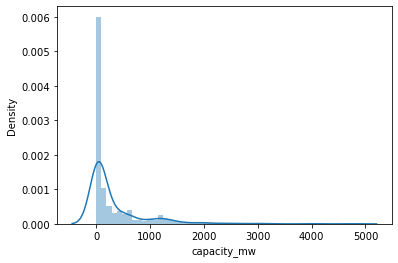

In [108]:
# for visualize skewness
sns.distplot(plant['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

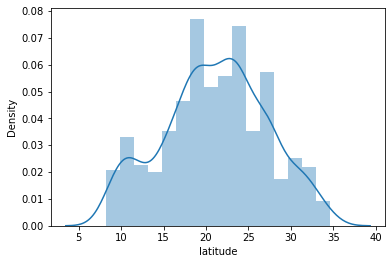

In [109]:
sns.distplot(plant['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

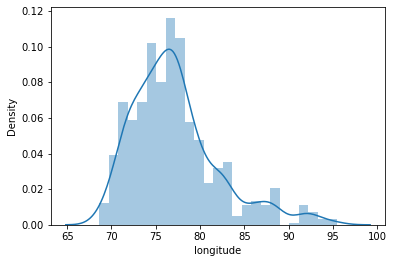

In [110]:
sns.distplot(plant['longitude'])

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

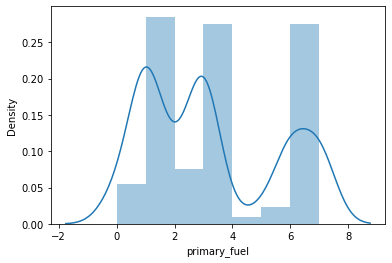

In [111]:
sns.distplot(plant['primary_fuel'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

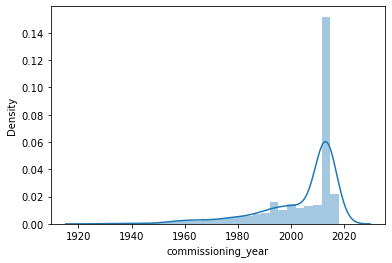

In [112]:
sns.distplot(plant['commissioning_year'])

<AxesSubplot:xlabel='source', ylabel='Density'>

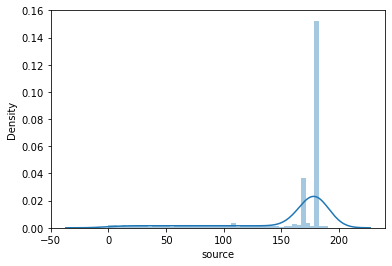

In [113]:
sns.distplot(plant['source'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

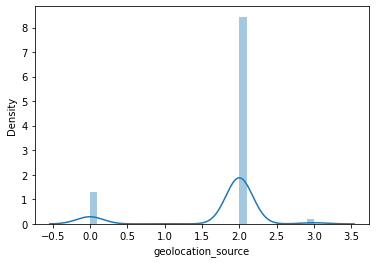

In [114]:
sns.distplot(plant['geolocation_source'])

<AxesSubplot:xlabel='generation_data_source', ylabel='Density'>

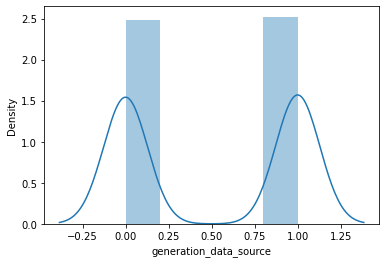

In [115]:
sns.distplot(plant['generation_data_source'])

In [116]:
# removing Outliers

from scipy.stats import zscore
z = np.abs(zscore(plant))
z

array([[0.54931054, 1.16304149, 0.79221923, ..., 0.95510626, 1.07855561,
        0.9912279 ],
       [0.38462759, 0.60312633, 0.51537505, ..., 1.45401981, 0.35112102,
        0.9912279 ],
       [0.48602401, 0.13415478, 1.57471932, ..., 0.31296569, 0.35112102,
        0.9912279 ],
       ...,
       [0.50964868, 0.95172937, 0.31869287, ..., 0.31296569, 0.35112102,
        0.9912279 ],
       [0.41566731, 0.53492271, 0.68963939, ..., 0.28988819, 0.35112102,
        0.9912279 ],
       [0.52516854, 1.82682618, 0.06485863, ..., 0.31296569, 0.35112102,
        0.9912279 ]])

In [117]:
threshold =3
print(np.where(z>3))

(array([ 15,  20, 144, 180, 184, 210, 215, 222, 239, 245, 247, 253, 309,
       324, 334, 341, 343, 361, 362, 364, 365, 372, 376, 405, 417, 428,
       445, 455, 479, 483, 485, 493, 494, 495, 500, 520, 521, 539, 542,
       557, 575, 584, 602, 622, 639, 649, 658, 696, 707, 710, 727, 729,
       759, 787, 789, 808, 809, 819, 820, 849, 858, 881, 895], dtype=int64), array([0, 5, 0, 2, 2, 0, 5, 4, 5, 2, 5, 5, 0, 2, 2, 2, 4, 2, 5, 0, 0, 4,
       0, 5, 2, 2, 4, 4, 4, 0, 4, 5, 0, 0, 2, 2, 5, 4, 4, 5, 4, 4, 4, 4,
       2, 0, 0, 0, 4, 4, 0, 4, 5, 0, 0, 4, 0, 2, 5, 4, 5, 0, 5],
      dtype=int64))


In [118]:
plant_new = plant[(z<3).all(axis =1)]
print(plant.shape)
print(plant_new.shape)

(908, 8)
(845, 8)


# Divide Data in Feature and Vector

In [120]:
x = plant_new.drop(['capacity_mw'], axis =1)
y = plant_new['capacity_mw']

# Remove Skewness

In [122]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method ='yeo-johnson')
x

array([[ 1.17478009, -0.80823107,  1.14419438, ..., -1.54747226,
        -1.47577715,  0.97314162],
       [ 0.60259224, -0.40051807, -1.00620402, ..., -1.60392591,
         0.21272089,  0.97314162],
       [ 0.1303655 , -2.24411392,  1.42164512, ..., -0.51135427,
         0.21272089,  0.97314162],
       ...,
       [-0.93150502, -0.13706973,  1.42164512, ..., -0.51135427,
         0.21272089,  0.97314162],
       [ 0.53346445, -0.65184824, -1.00620402, ..., -1.34409123,
         0.21272089,  0.97314162],
       [-1.76669663,  0.32146113,  1.42164512, ..., -0.51135427,
         0.21272089,  0.97314162]])

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.17478009, -0.80823107,  1.14419438, ..., -1.54747226,
        -1.47577715,  0.97314162],
       [ 0.60259224, -0.40051807, -1.00620402, ..., -1.60392591,
         0.21272089,  0.97314162],
       [ 0.1303655 , -2.24411392,  1.42164512, ..., -0.51135427,
         0.21272089,  0.97314162],
       ...,
       [-0.93150502, -0.13706973,  1.42164512, ..., -0.51135427,
         0.21272089,  0.97314162],
       [ 0.53346445, -0.65184824, -1.00620402, ..., -1.34409123,
         0.21272089,  0.97314162],
       [-1.76669663,  0.32146113,  1.42164512, ..., -0.51135427,
         0.21272089,  0.97314162]])

# Model

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [126]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 131  The model performs very well
At random_state:- 131
Training r2_score is:- 38.491380522152575
Testing r2_score is:- 38.48824000601756


In [127]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=131,test_size=0.20)

In [128]:
lr.fit(x_train, y_train)

LinearRegression()

In [129]:
lr.score(x_train, y_train)

0.39867767015617017

In [130]:
# predict the value

pred = lr.predict(x_test)
print("Predicted result price: ", pred)
print("actual price ", y_test)

Predicted result price:  [115.85953101 591.07290167  61.41944304 -38.77631073  -8.14769255
 518.75276425 436.81511226 430.77642006 -30.79678153 120.858785
 -21.55910018 -30.60810388 666.73606702 593.00479712   0.97800099
 -32.14854297 -25.34276332 -61.70959548 -33.49790532 669.47816179
 -13.61194974 400.03024586 145.72472965 623.45601948 -23.66215498
 698.43844192 489.16504836 415.75347394  66.02824177 757.25618986
 486.68709807 534.75516497 441.72528095 497.38418911 -50.50972373
 554.94477008  61.67539881 244.06446033 111.49401353 -39.74914414
 721.97850533 568.08041824 483.0143763  556.37168616 751.97639844
 -38.88870691  42.83313295 -38.64503141 104.32493489 426.27185313
 415.22038805 609.94895242 -52.81566945 670.05146424 -33.26607725
 152.24321749 -21.904397   582.11355474 106.74160043 607.12295455
 100.81954487 523.74523619 135.47360409 -36.10609778 418.96158872
 -26.18991455 698.16028541 -38.63603987 389.63368675 111.45243275
 -26.40231931 -21.80706899 182.22924086 398.311669   

In [131]:
print('error:')

print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test, pred))

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

print(r2_score(y_test, pred))

error:
Mean absolute error:  217.2928883922545
Mean squared error:  115285.3186449027
Root Mean Squared Error:  339.5369179410432
0.3143844237126736


# Divide feature and Vetor

In [141]:
# primary_fuel
x = plant_new.drop(['primary_fuel'], axis =1)
y = plant_new['primary_fuel']

# Model

In [145]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 53 The model performs very well
Random_state:- 53
Training r2_score is:- 57.98816568047337
Testing r2_score is:- 57.98816568047337
At random state 146 The model performs very well
Random_state:- 146
Training r2_score is:- 62.1301775147929
Testing r2_score is:- 62.1301775147929
At random state 191 The model performs very well
Random_state:- 191
Training r2_score is:- 55.62130177514793
Testing r2_score is:- 55.62130177514793
At random state 226 The model performs very well
Random_state:- 226
Training r2_score is:- 59.171597633136095
Testing r2_score is:- 59.171597633136095
At random state 236 The model performs very well
Random_state:- 236
Training r2_score is:- 57.98816568047337
Testing r2_score is:- 57.98816568047337
At random state 241 The model performs very well
Random_state:- 241
Training r2_score is:- 61.53846153846154
Testing r2_score is:- 61.53846153846154
At random state 253 The model performs very well
Random_state:- 253
Training r2_score is:- 57.39644970414201

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 967)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.36      0.30      0.33        44
           2       0.00      0.00      0.00        13
           3       0.38      0.56      0.45        45
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.23      0.30      0.26        23
           7       0.17      0.21      0.18        29

    accuracy                           0.30       169
   macro avg       0.14      0.17      0.15       169
weighted avg       0.25      0.30      0.27       169



# Cross Validation Score

In [149]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 57.75043976112848
accuracy_score is:- 58.57988165680473


At cv:- 3
Cross validation score is:- 58.22501535381068
accuracy_score is:- 58.57988165680473


At cv:- 4
Cross validation score is:- 58.348050612536895
accuracy_score is:- 58.57988165680473


At cv:- 5
Cross validation score is:- 58.57988165680473
accuracy_score is:- 58.57988165680473


At cv:- 6
Cross validation score is:- 57.865585950692335
accuracy_score is:- 58.57988165680473


At cv:- 7
Cross validation score is:- 58.57831562377018
accuracy_score is:- 58.57988165680473


At cv:- 8
Cross validation score is:- 57.28324348607367
accuracy_score is:- 58.57988165680473


At cv:- 9
Cross validation score is:- 58.82457612038944
accuracy_score is:- 58.57988165680473




In [150]:
lsscore_selected = cross_val_score(lr,x,y,cv= 7).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.5857831562377018 
The accuracy score is:  0.5857988165680473


# Naive Bayes Classification

In [151]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [152]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb, y_test))

0.6627218934911243


In [153]:
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

[[10  0  0  0  0  0  0  0]
 [ 9  7  0 27  0  0  1  0]
 [ 1  1  0 11  0  0  0  0]
 [ 0  1  0 43  1  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.70      0.16      0.26        44
           2       0.00      0.00      0.00        13
           3       0.51      0.96      0.66        45
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.96      1.00      0.98        23
           7       1.00      1.00      1.00        29

    accuracy                           0.66       169
   macro avg       0.46      0.51      0.45       169
weighted avg       0.65      0.66      0.59       169



# Support Vector Classification

In [154]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [155]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.3727810650887574


In [156]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly')
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [157]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.44970414201183434


In [158]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [159]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.7514792899408284


# KNN Classifier

In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
predknn

array([7, 3, 6, 3, 6, 7, 7, 7, 6, 1, 7, 7, 3, 3, 1, 7, 7, 3, 3, 3, 1, 7,
       6, 7, 3, 1, 1, 1, 6, 1, 2, 2, 6, 3, 3, 1, 3, 1, 3, 0, 6, 1, 1, 6,
       0, 3, 3, 7, 1, 6, 1, 1, 1, 7, 1, 6, 1, 1, 1, 7, 7, 2, 6, 3, 1, 6,
       7, 1, 2, 6, 1, 7, 6, 3, 7, 3, 1, 3, 1, 1, 1, 1, 3, 7, 1, 6, 6, 1,
       2, 7, 3, 3, 6, 1, 0, 7, 0, 3, 1, 1, 6, 3, 6, 1, 2, 1, 7, 7, 5, 1,
       1, 6, 7, 6, 6, 2, 1, 6, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 6,
       6, 7, 7, 0, 7, 3, 1, 1, 1, 1, 3, 1, 7, 2, 3, 3, 3, 3, 2, 3, 2, 6,
       3, 2, 2, 1, 1, 3, 3, 3, 0, 3, 3, 6, 1, 0, 1])

In [161]:
print(confusion_matrix(y_test, predknn))

[[ 5  1  0  0  0  0  4  0]
 [ 1 31  6  1  0  0  4  1]
 [ 0  2  4  7  0  0  0  0]
 [ 0 11  2 32  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  0  1  0  1  0  0]
 [ 1  4  0  1  0  0 17  0]
 [ 0  1  0  0  0  0  2 26]]


In [162]:
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.58      0.70      0.64        44
           2       0.33      0.31      0.32        13
           3       0.76      0.71      0.74        45
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       0.63      0.74      0.68        23
           7       0.96      0.90      0.93        29

    accuracy                           0.69       169
   macro avg       0.62      0.51      0.54       169
weighted avg       0.70      0.69      0.68       169



# Decision Tree Classifier

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
preddct = dct.predict(x_test)
preddct

array([7, 3, 1, 3, 6, 7, 7, 7, 6, 3, 0, 7, 3, 3, 6, 7, 7, 3, 2, 2, 3, 7,
       7, 7, 3, 1, 1, 1, 6, 3, 2, 3, 6, 1, 6, 1, 1, 2, 3, 0, 7, 1, 1, 6,
       0, 3, 1, 7, 1, 1, 3, 2, 2, 7, 1, 1, 3, 6, 3, 7, 7, 2, 6, 3, 1, 6,
       7, 1, 2, 0, 1, 7, 6, 3, 7, 2, 2, 3, 1, 6, 1, 1, 3, 7, 2, 6, 6, 1,
       1, 7, 3, 3, 0, 1, 0, 7, 1, 3, 1, 1, 6, 3, 1, 1, 1, 1, 7, 7, 2, 1,
       3, 6, 7, 6, 6, 1, 2, 0, 3, 3, 3, 1, 0, 2, 3, 3, 3, 1, 2, 3, 1, 6,
       6, 7, 7, 0, 7, 3, 5, 6, 7, 1, 2, 3, 7, 1, 1, 3, 3, 3, 3, 2, 1, 6,
       3, 2, 1, 3, 3, 2, 3, 3, 6, 2, 2, 0, 3, 0, 1])

In [165]:
print(classification_report(y_test, preddct))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.68      0.64      0.66        44
           2       0.24      0.38      0.29        13
           3       0.77      0.73      0.75        45
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29

    accuracy                           0.75       169
   macro avg       0.56      0.58      0.57       169
weighted avg       0.76      0.75      0.75       169



Best performing Model is Decision Tree Classifier.

# Model Saving:

In [168]:
import pickle
filename = 'global_power_plant_project.pkl'
pickle.dump(dct, open(filename, 'wb'))

# Conclusion

In [169]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
con = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
con

,original,predicted
0,7,7
1,3,3
2,0,6
3,3,7
4,6,6
...,...,...
164,3,3
165,1,6
166,3,3
167,0,6
